In [41]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, roc_curve, roc_auc_score
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import seaborn as sns
import pickle
 

In [86]:
from sklearn import linear_model
from matplotlib.lines import Line2D


In [42]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv')

In [43]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [44]:
pf = ProfileReport(df)

In [45]:
df['BMI'] =df['BMI'].replace(0, df['BMI'].mean())

In [46]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [47]:
df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].mean())

In [48]:
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].mean())

In [49]:
df['Glucose'] = df['Glucose'].replace(0, df['Glucose'].mean())

In [50]:
df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].mean())

<AxesSubplot:>

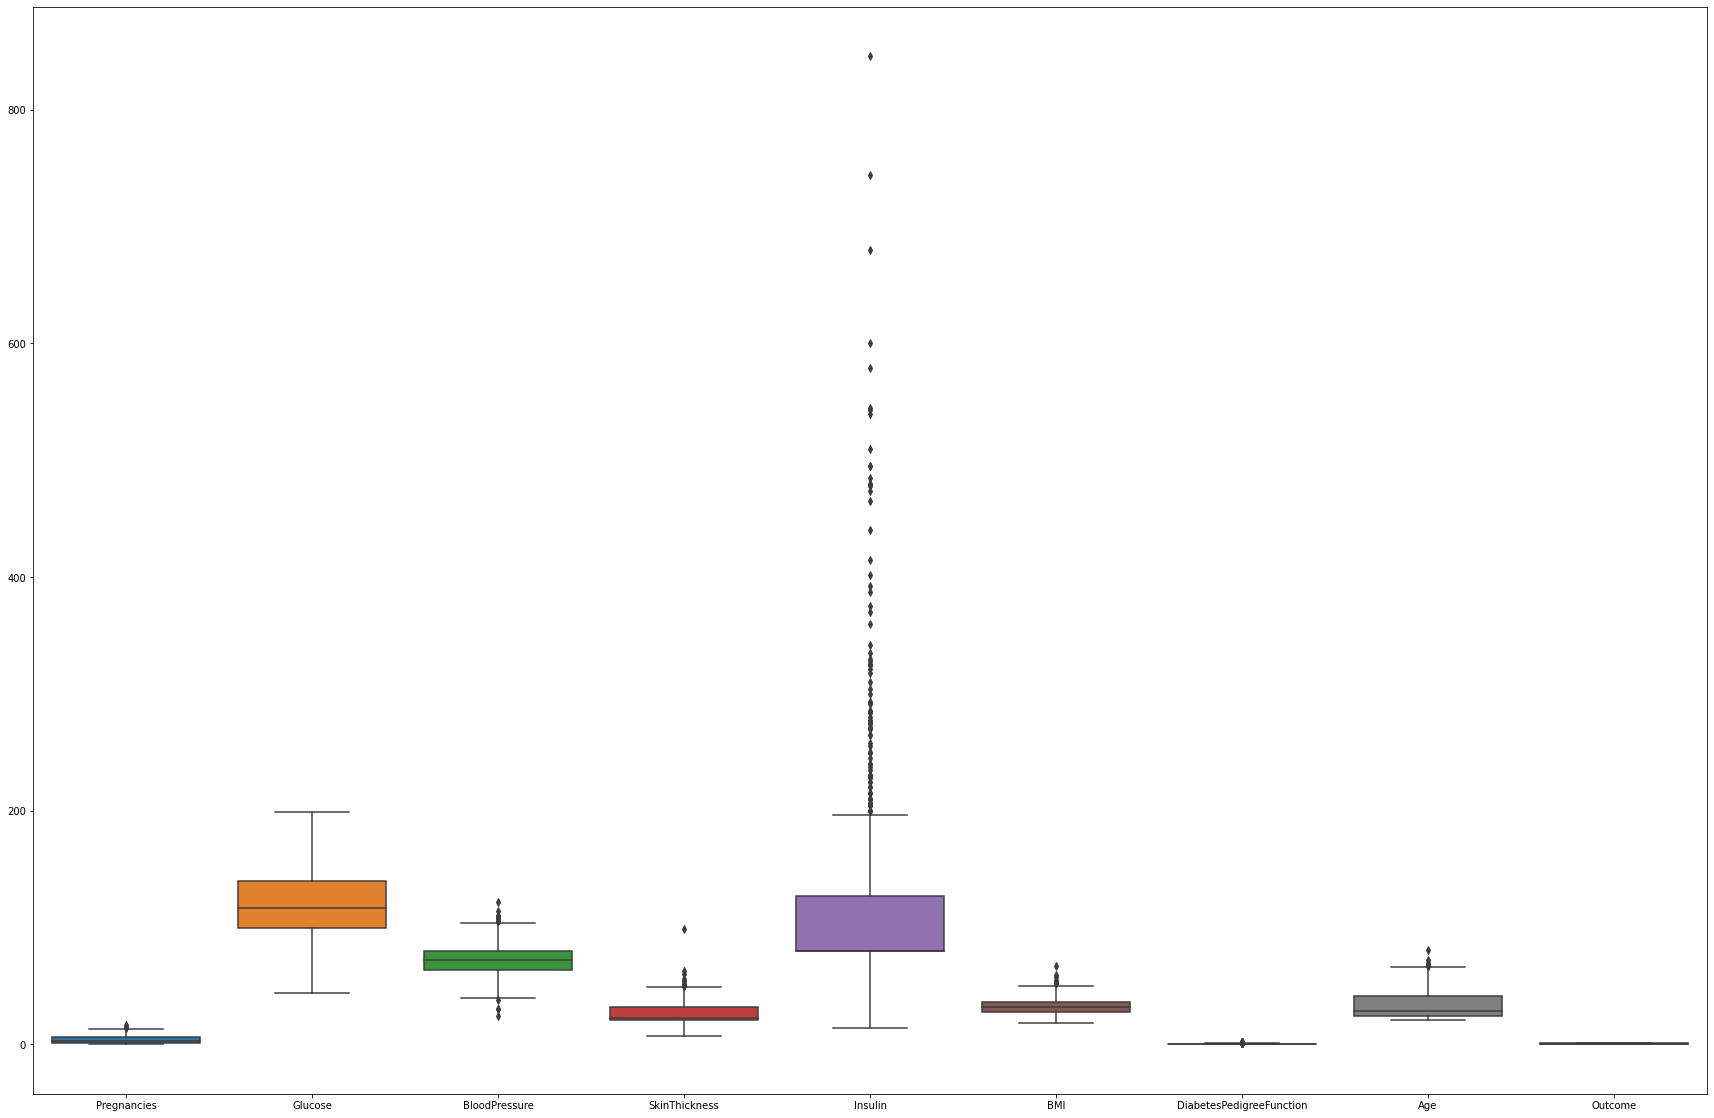

In [51]:
fig, ax = plt.subplots(figsize=(30,20))
sns.boxplot(data=df)

In [52]:
q = df['Insulin'].quantile(0.95)

In [53]:
df_new = df[df['Insulin'] < q]

In [54]:
df_new

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


<AxesSubplot:>

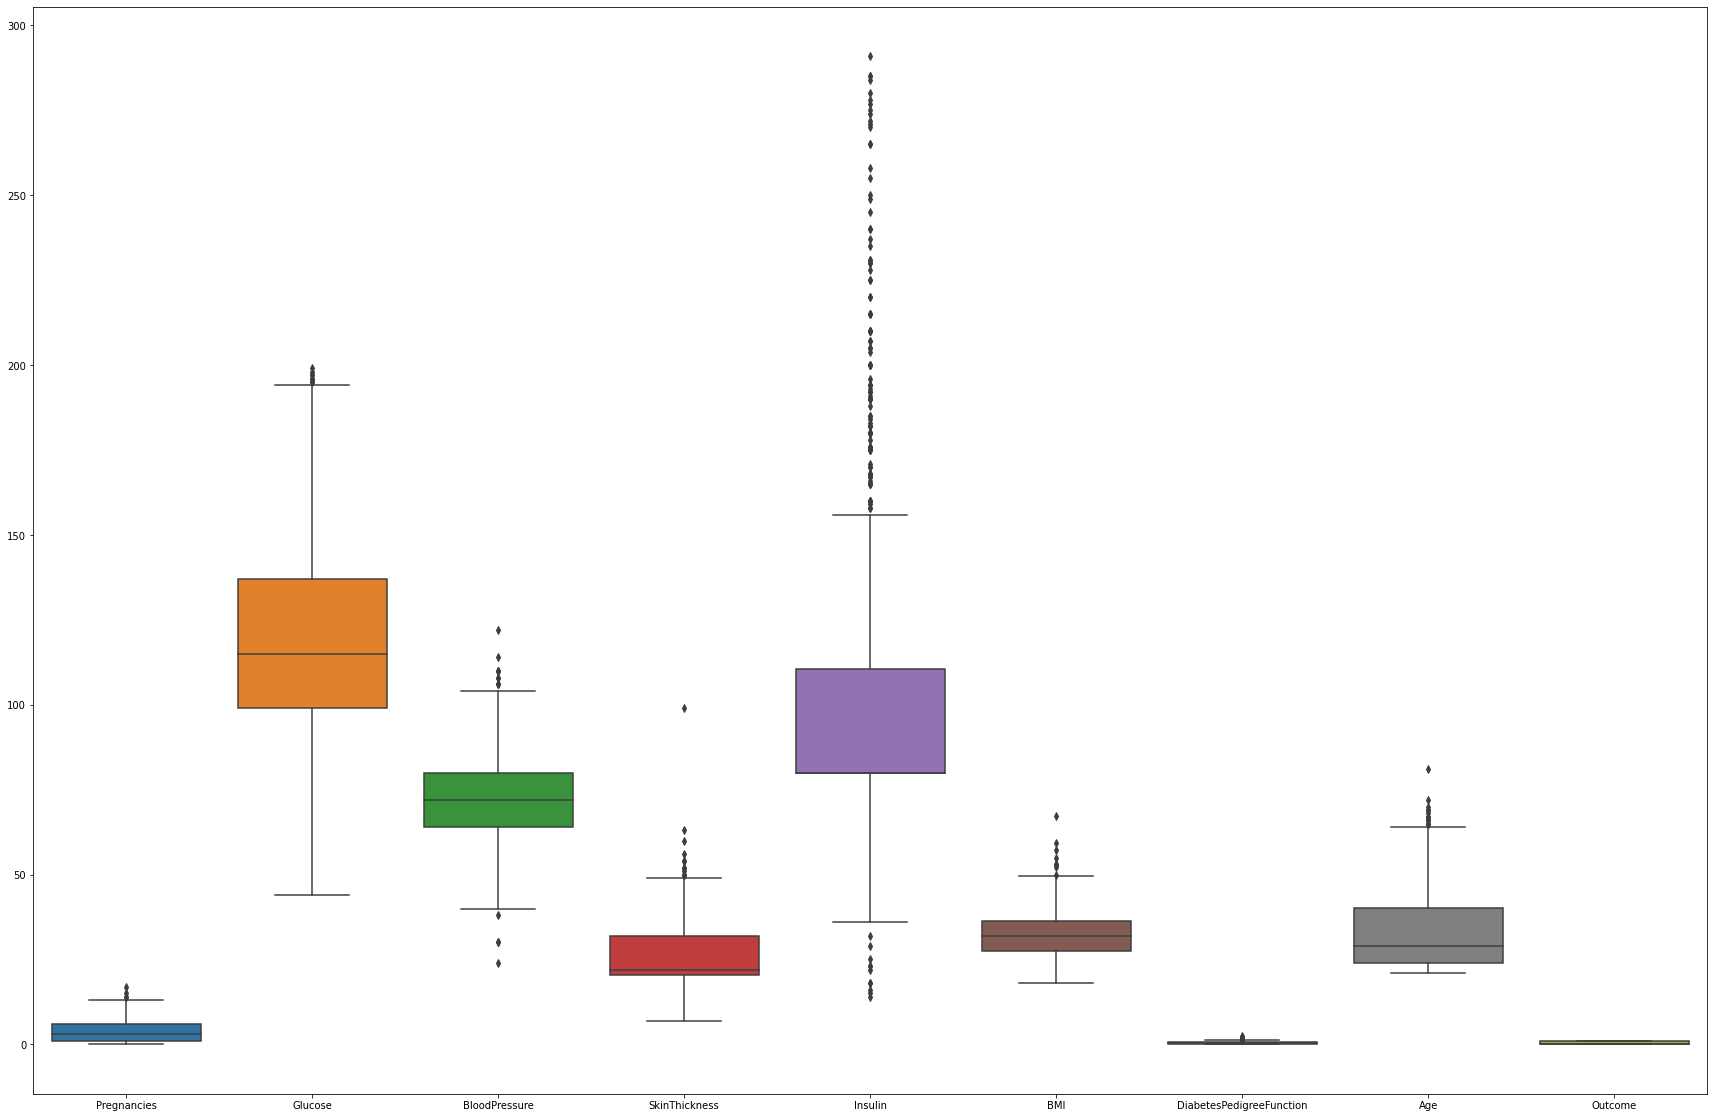

In [55]:
fig,ax = plt.subplots(figsize = (30,20))
sns.boxplot(data=df_new)

In [56]:
q = df_new['BMI'].quantile(.99)
df_new = df_new[df_new['BMI'] < q]


q = df_new['Pregnancies'].quantile(.98)
df_new = df_new[df_new['Pregnancies'] < q]

q = df_new['SkinThickness'].quantile(.95)
df_new = df_new[df_new['SkinThickness'] < q]

# q = df_new['Insulin'].quantile(.97)
# df_new = df_new[df_new['Insulin'] < q]

q = df_new['DiabetesPedigreeFunction'].quantile(.99)
df_new = df_new[df_new['DiabetesPedigreeFunction'] < q]


q = df_new['Age'].quantile(.99)
df_new = df_new[df_new['Age'] < q]


In [57]:
df_new

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,9,89.0,62.0,20.536458,79.799479,22.5,0.142,33,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


<AxesSubplot:>

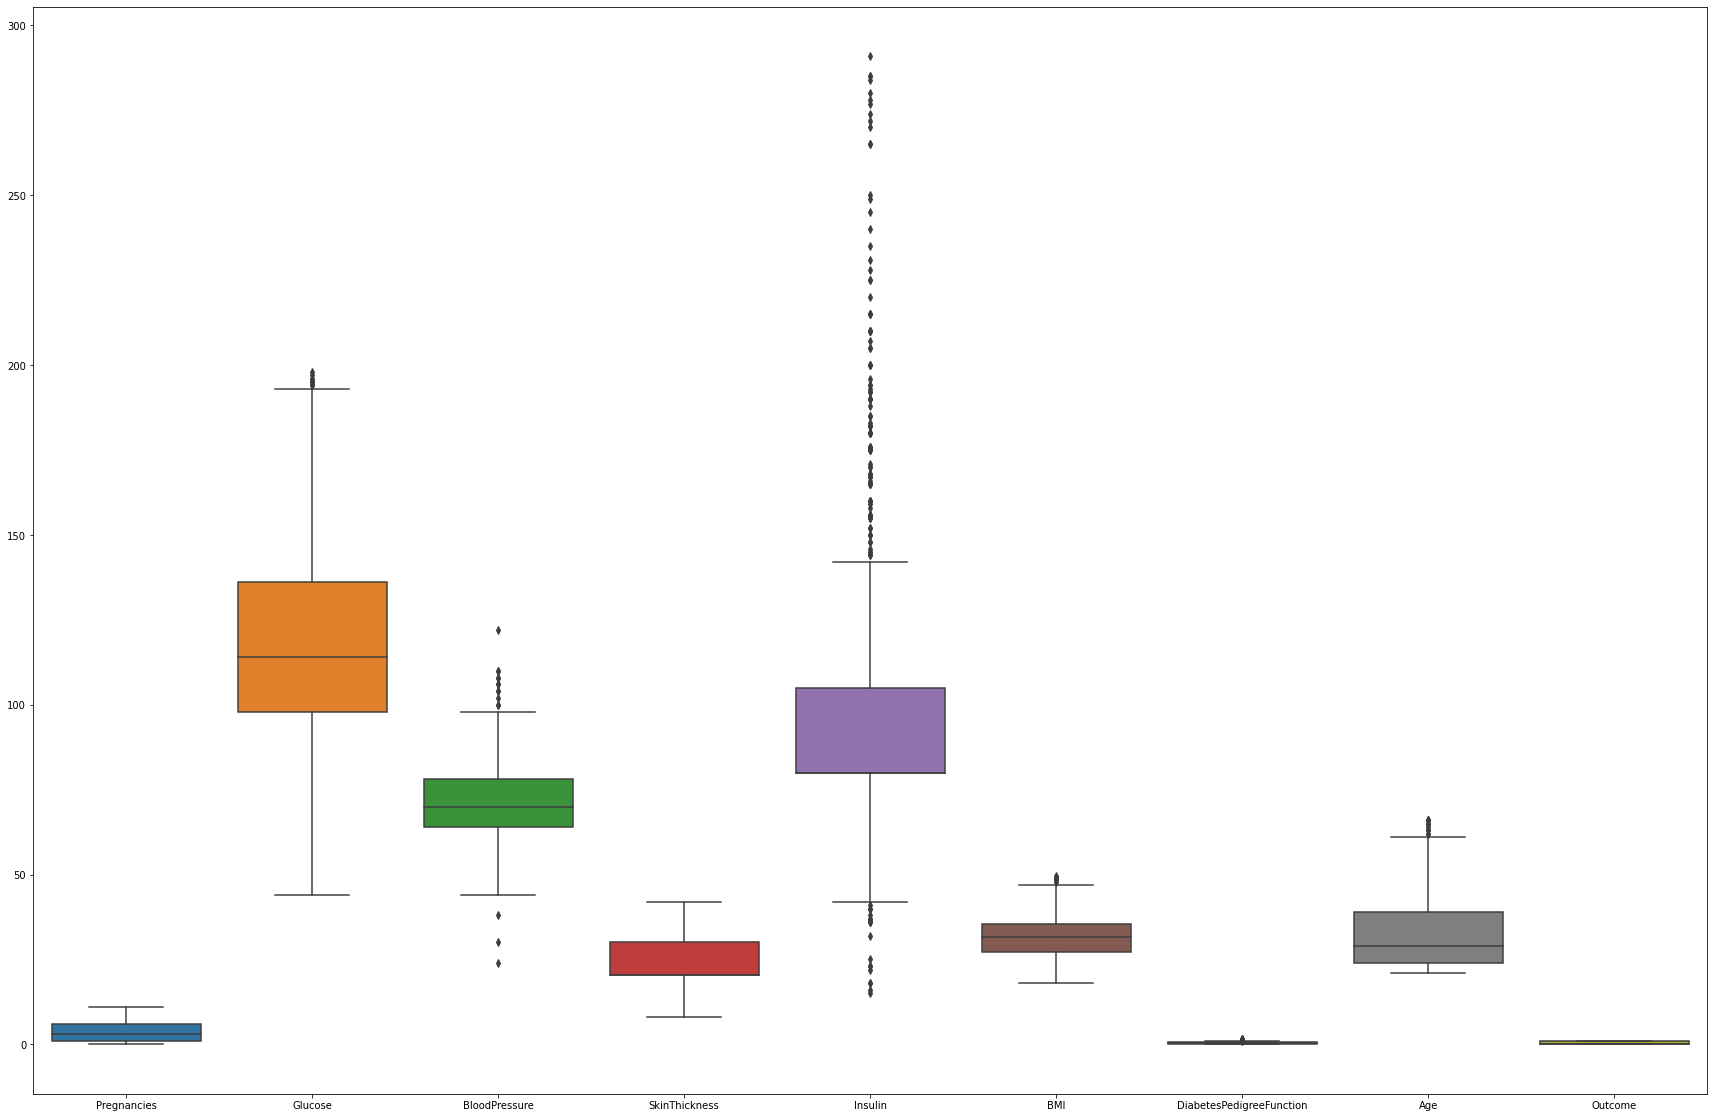

In [58]:
fig = plt.subplots(figsize = (30,20))
sns.boxplot(data=df_new)

In [59]:
# ProfileReport(df_new)

In [60]:
y = df_new['Outcome']
y

0      1
1      0
2      1
3      0
5      0
      ..
762    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 645, dtype: int64

In [61]:
X = df_new.drop(columns=['Outcome'])

In [62]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30
...,...,...,...,...,...,...,...,...
762,9,89.0,62.0,20.536458,79.799479,22.5,0.142,33
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47


In [63]:
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(X))

In [64]:
# ProfileReport(scaled_df)

<AxesSubplot:>

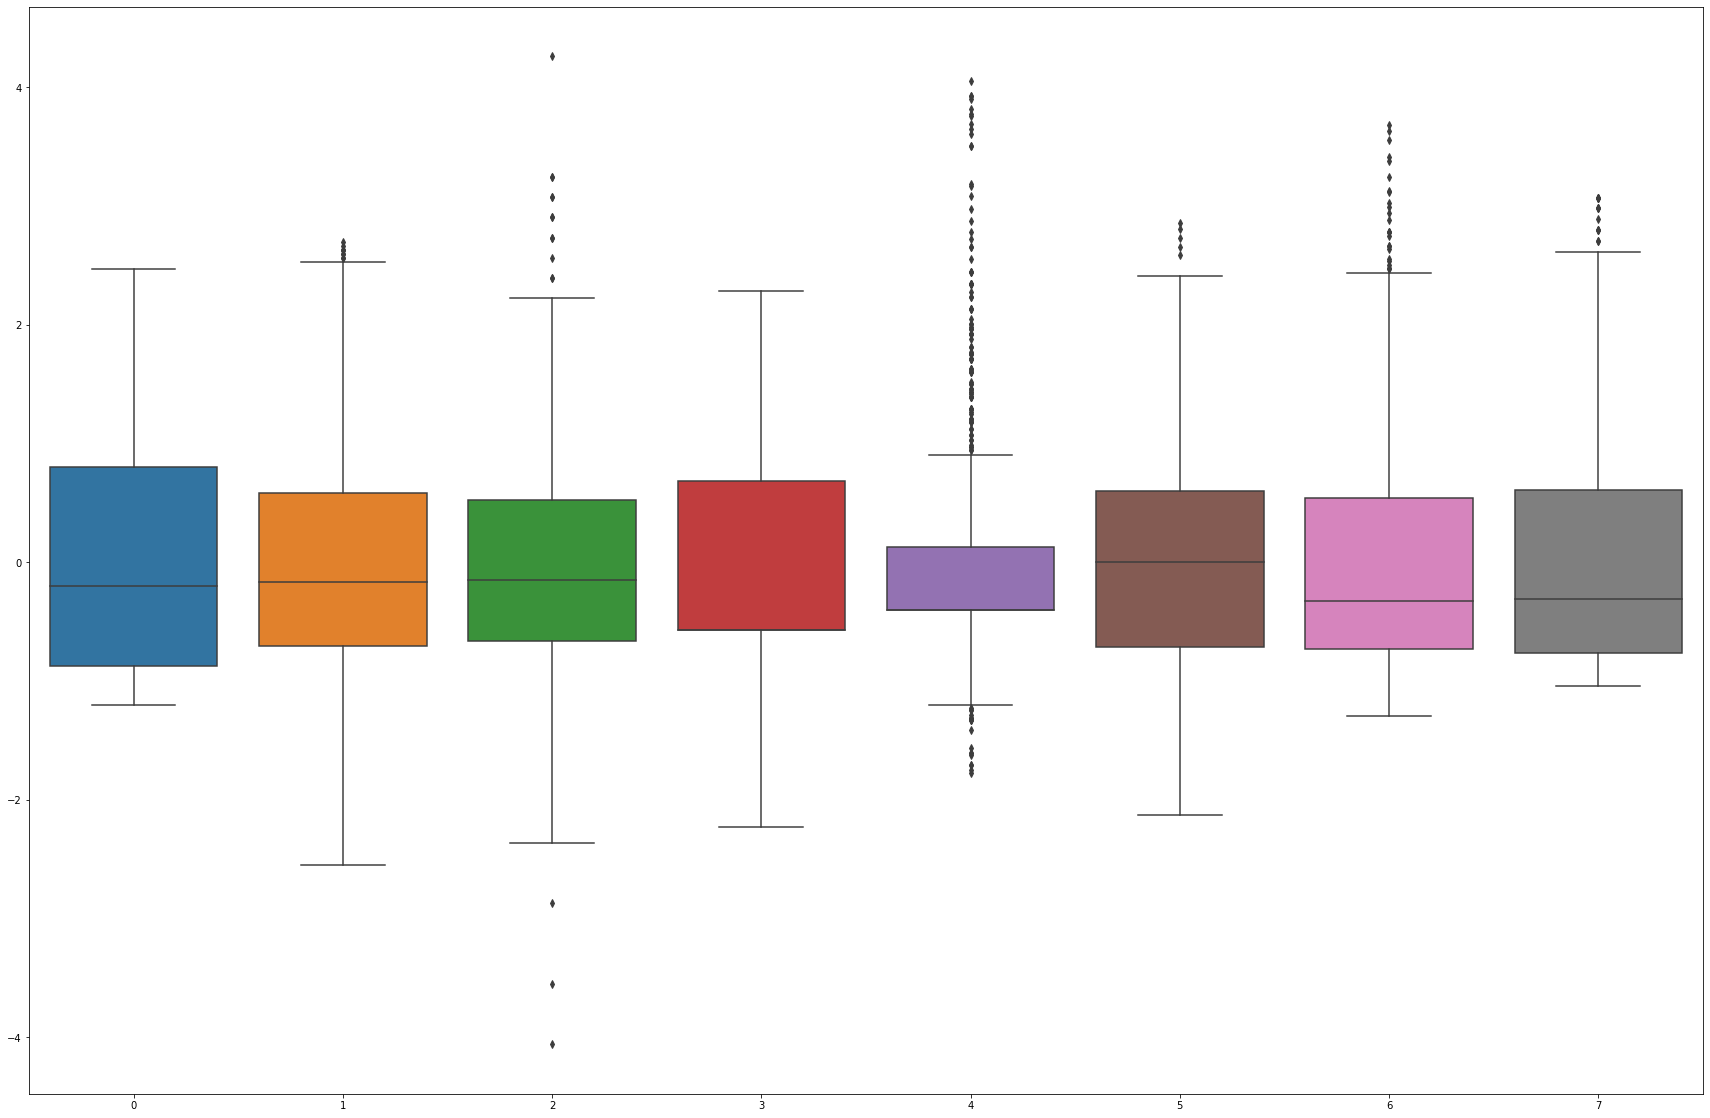

In [65]:
fig = plt.subplots(figsize = (30,20))
sns.boxplot(data=scaled_df)

In [66]:
def vif_score(x):
    scaler = StandardScaler()
    arr = scaler.fit_transform(x)
    return pd.DataFrame([[x.columns[i], vif(arr,i)] for i in range(arr.shape[1])], columns=['feature', 'vif_score'])

In [67]:
vif_score(X)

,feature,vif_score
0,Pregnancies,1.443127
1,Glucose,1.319384
2,BloodPressure,1.261737
3,SkinThickness,1.393225
4,Insulin,1.247221
5,BMI,1.459971
6,DiabetesPedigreeFunction,1.034993
7,Age,1.664116


In [68]:
## No multicolinearity exists since no vif is greater than 10. Therefore there is no need to drop any columns

In [69]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df, y, test_size=.20, random_state=144)

In [70]:
logr = LogisticRegression(verbose=1, solver='liblinear')

In [71]:
logr.fit(X_train, y_train)

[LibLinear]iter  1 act 1.160e+02 pre 1.045e+02 delta 1.298e+00 f 3.577e+02 |g| 2.023e+02 CG   2
iter  2 act 1.175e+01 pre 1.037e+01 delta 1.298e+00 f 2.417e+02 |g| 4.392e+01 CG   3
iter  3 act 6.757e-01 pre 6.450e-01 delta 1.298e+00 f 2.300e+02 |g| 9.006e+00 CG   3
iter  4 act 5.266e-03 pre 5.248e-03 delta 1.298e+00 f 2.293e+02 |g| 7.880e-01 CG   3
iter  5 act 1.507e-05 pre 1.507e-05 delta 1.298e+00 f 2.293e+02 |g| 5.190e-02 CG   2


LogisticRegression(solver='liblinear', verbose=1)

In [72]:
type(X_test.iloc[0])

pandas.core.series.Series

In [73]:
logr.predict_proba(X_test)[0]

array([0.48990607, 0.51009393])

In [74]:
logr.predict(X_test)

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0])

In [75]:
confusion_matrix(y_test, logr.predict(X_test))

array([[80,  9],
       [18, 22]])

In [76]:
tn, fp, fn, tp = confusion_matrix(y_test, logr.predict(X_test)).ravel()

In [77]:
accuracy = (tp+tn)/(tn+ fp+ fn+ tp)

In [78]:
accuracy

0.7906976744186046

In [79]:
roc_auc_score(y_test, logr.predict(X_test))

0.724438202247191

In [80]:
roc_curve(y_test, logr.predict(X_test))

(array([0.       , 0.1011236, 1.       ]),
 array([0.  , 0.55, 1.  ]),
 array([2, 1, 0]))

In [110]:
def output(train_targets, predictions):
    fig, ax = plt.subplots(figsize=(75, 30))

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
  
    ax.grid(color='blue', linestyle='-', linewidth=0.25, alpha=0.5)
    training_colors = ['#4786D1' if target <= 0 else '#F28627' for target in train_targets]
    prediction_colors = ['#4786D1' if target <= 0 else '#F28627' for target in predictions]
    train_set_len = len(train_targets)
    predictions_len = len(predictions)
    plt.scatter(np.arange(0, train_set_len), train_targets, color=training_colors, marker='o', s=[12 * train_set_len])
    plt.scatter(np.arange(0, predictions_len), predictions, color=prediction_colors, marker='X', s=[40 * predictions_len])
    ax.set_xlabel('Observation')
    ax.set_ylabel('Target value')
    
    legend_items = [Line2D([0], [0], color='#4786D1', markersize=15), 
        Line2D([0], [0], color='#F28627', markersize=15),
        Line2D([0], [0], color='w', marker='o', markerfacecolor='#979797', markeredgecolor='#979797', markersize=15),
        Line2D([0], [0], color='w', marker='X', markerfacecolor='#979797', markeredgecolor='#979797', markersize=15)]

    ax.legend(handles=legend_items,
    labels=['Class 0: Non Productive', 'Class 1: Productive', 'Training set', 'Predictions'],labelspacing=1.5, borderpad=1)
    
    plt.show()



def fit_logr(features, targets):
    train_features, test_features, train_targets, test_targets = train_test_split(features, targets, test_size=0.25, random_state=123)
    model = linear_model.LinearRegression()
    fitted_model = model.fit(train_features, train_targets)
    predictions = fitted_model.predict(test_features)
    
    
    print('Coeff_: ' + str(fitted_model.coef_))
    print('Intercept_: ' + str(fitted_model.intercept_))
    print('R-squared: ' + str(fitted_model.score(train_features, np.array(train_targets).reshape(-1, 1))))
    
    output(train_targets, predictions)


Coeff_: [ 0.03754521  0.19290398  0.00305559  0.02162478 -0.10031061  0.12391553
  0.03621025  0.03379076]
Intercept_: 0.3198101291815781
R-squared: 0.3176081825023801


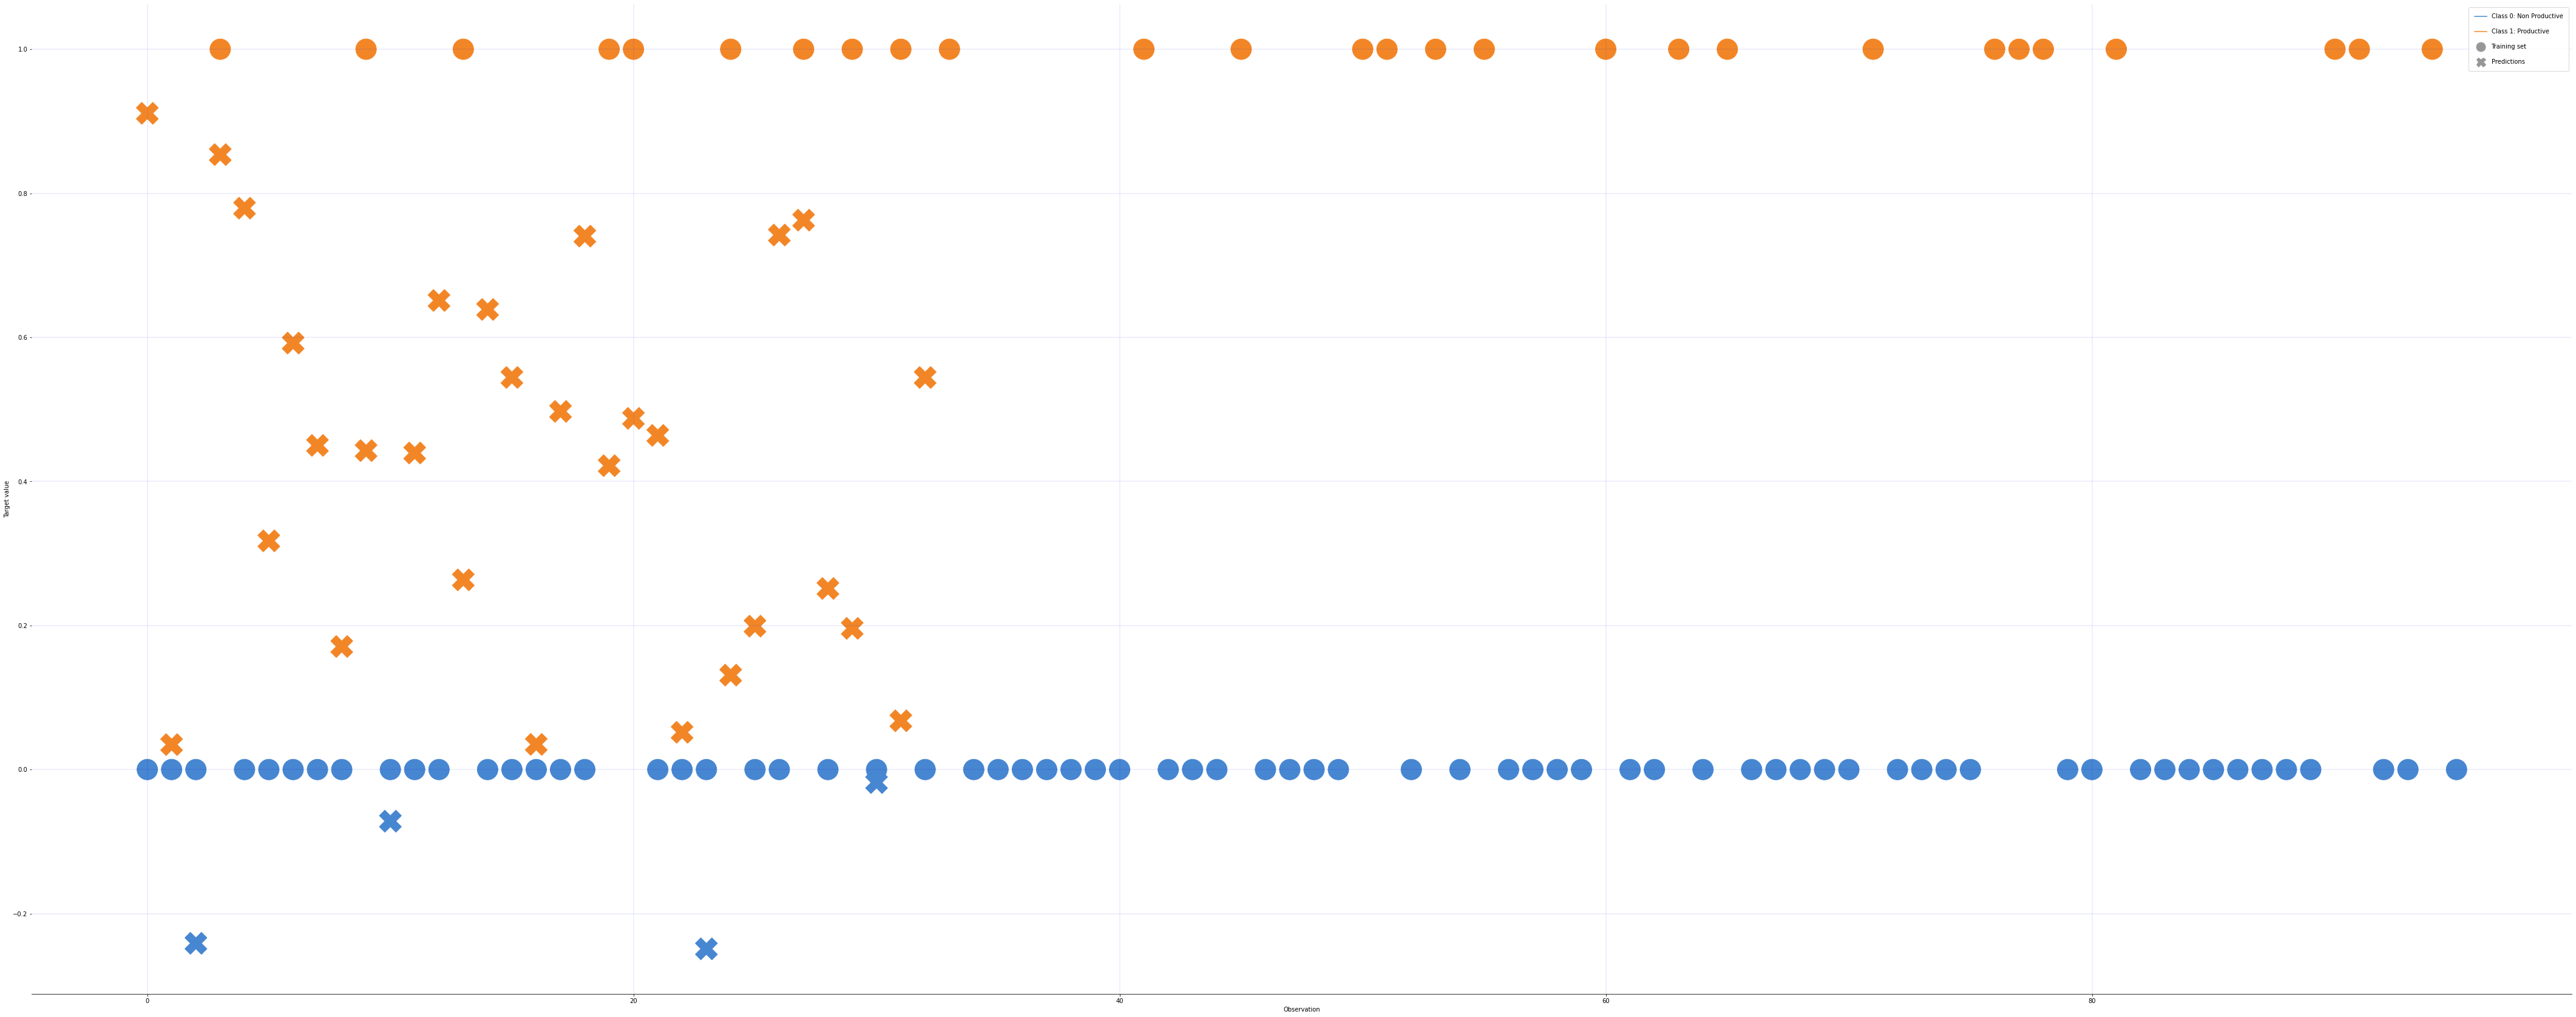

In [111]:
fit_logr(X_test, y_test)